In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [2]:
df=pd.read_csv('./Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


# Data Preprocessing 


In [3]:
# Drop 'User ID' and 'Gender' columns, which are not required
df = df.drop(columns=['User ID'])


In [4]:
mapping = {
    'Male': 1,
    'Female': 0
}
df['Gender'] = df['Gender'].map(mapping)


In [5]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [6]:
X = df[['Age', 'EstimatedSalary']].values  # Features
y = df['Purchased'].values                # Target


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) #mean=0, std=1
X_test = scaler.transform(X_test)

# Build the logistic Regression Model

In [9]:

classifier = LogisticRegression()


classifier.fit(X_train, y_train)

LogisticRegression()

# Evaluate the Model


In [10]:
y_pred = classifier.predict(X_test)

# TP, FP, TN, FN, Accuracy, Error rate, Precision


In [11]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)


TP = cm[1, 1] #quadrant is III
FP = cm[0, 1] #quadrant is I
TN = cm[0, 0] #quadrant is II
FN = cm[1, 0] #quadrant is IV


accuracy = (TP + TN) / (TP + TN + FP + FN)


error_rate = (FP + FN) / (TP + TN + FP + FN)


precision = TP / (TP + FP)

print(f"True Positives (TP): {TP}")
print(f"False Positives (FP): {FP}")
print(f"True Negatives (TN): {TN}")
print(f"False Negatives (FN): {FN}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Error Rate: {error_rate:.4f}")
print(f"Precision: {precision:.4f}")

True Positives (TP): 19
False Positives (FP): 2
True Negatives (TN): 50
False Negatives (FN): 9
Accuracy: 0.8625
Error Rate: 0.1375
Precision: 0.9048


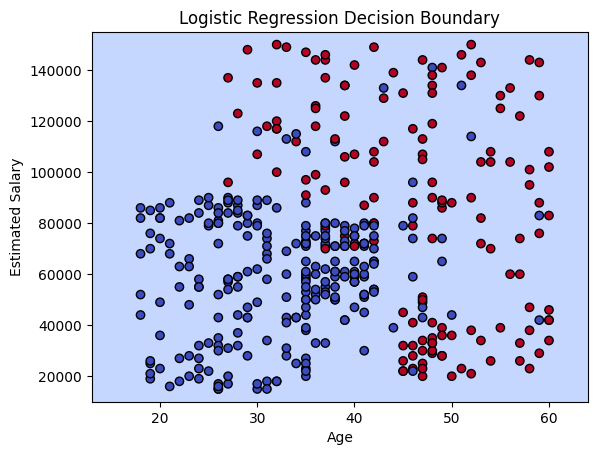

In [12]:
# Plotting decision boundary
# Step 1: Create a mesh grid
x_min, x_max = X[:, 0].min() - 5, X[:, 0].max() + 5
y_min, y_max = X[:, 1].min() - 5000, X[:, 1].max() + 5000
xx, yy = np.meshgrid(np.arange(x_min, x_max, 1),
                     np.arange(y_min, y_max, 100))

# Step 2: Predict on mesh grid
Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Step 3: Plot
plt.contourf(xx, yy, Z, alpha=0.5, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='coolwarm')
plt.title('Logistic Regression Decision Boundary')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.show()